# Midterm Exam  (80 marks)

## Please read the instructions carefully prior to starting the midterm.

Prior to starting the midterm, please ensure you have signed the Exam Honor statement. Failure to sign the honor statement will result in your submission not being considered for grading.

Create a copy of the notebook to start answering the questions. Name your notebook in the format ITP449_Midterm1_lastname_firstname.ipynb to facilitate the grading process.
Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the midterm exam section. Also provide us a link to your notebook during submission.

NOTE: Please give the TAs the permission to access your notebooks through the links you have provided during submission.

Please ensure you follow all the steps mentioned in the midterm.

Most questions have sample outputs to help you understand the question.
 The dataset can be found in the link -
https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name'))

You have 1 hour 50 mintues to answer the questions. You will be provided an additional 10 minutes to submit your notebook on blackboard. Any submission beyond 10 minutes will be considered as a late submission.

**Answer any question involving subplots together in a single cell.

Good luck!

## 1. Python Basics (30 marks)



You will create a figure of 3 subplots that are arranged in a column as shown below.

Subplot 1 - (10 marks)
1. Create a variable x that contains 100 random integers between 1 and 500. (2 marks)  
2. Create a variable y that contains 100 random numbers distributed in a standard normal distribution.  (2 marks)
3. Plot a scatter chart of y vs x.  (3 marks)
4. Format the subplot as shown below.  (3 marks)

Subplot 2 - (10 marks)
1. Create A as a range of numbers from 0 to 11, in increments of 0.01. (2 marks)
2. Create B as the sine function of A. (Hint: np.sin()). (2 marks)
3. Plot B vs A.  (3 marks)
4. Format the subplot as shown below.  (3 marks)

Subplot 3 - (10 marks)
1. Use pandas to read the csv file time_series_covid19.csv  (1 mark)
2. Plot the number of cases vs date.   (5 marks)
3. Format the subplot as shown below.  (4 marks)

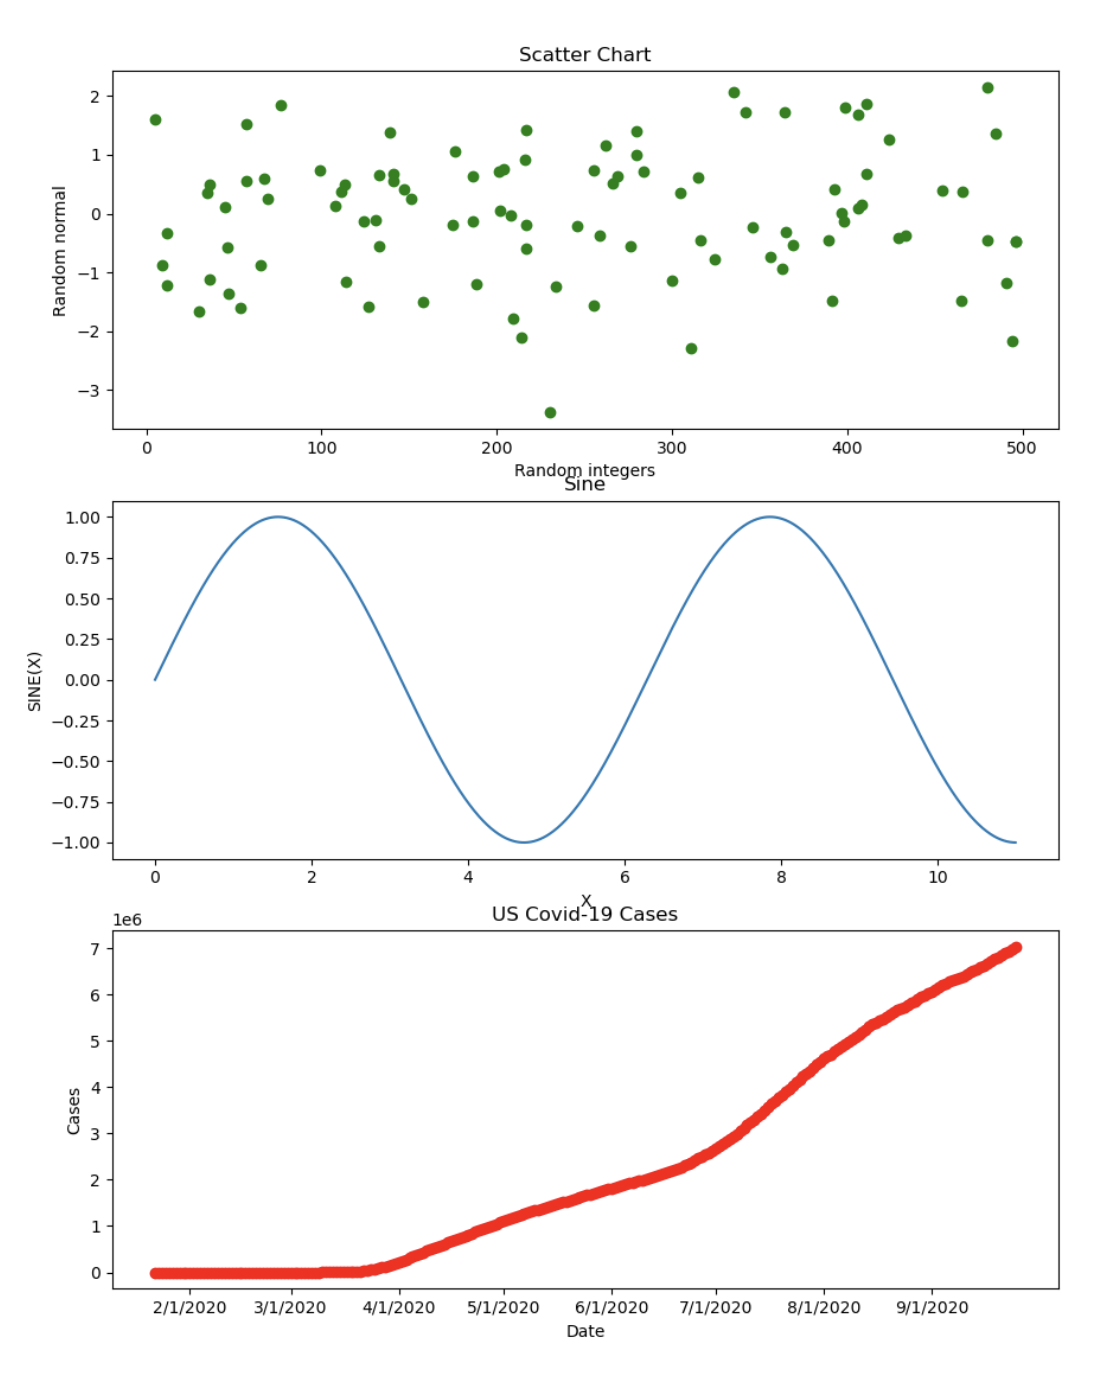

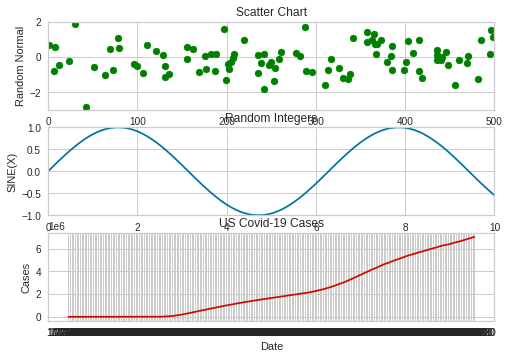

In [33]:
# Type solution here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


myFig = plt.figure()

ax1 = myFig.add_subplot(3,1,1)
ax2 = myFig.add_subplot(3,1,2)
ax3 = myFig.add_subplot(3,1,3)

x = 1 + 500 * np.random.rand(100)

y = np.random.normal(size=100)

ax1.scatter(x,y, color= 'green')
ax1.set_xlabel('Random Integers')
ax1.set_ylabel('Random Normal')
ax1.set_title('Scatter Chart')
ax1.set_xlim(0, 500)
ax1.set_ylim(-3, 2)


#subplot2
A = np.arange(0, 11.01, 0.1)
B = np.sin(A)
ax2.plot(A, B)
ax2.set_xlabel('X')
ax2.set_ylabel('SINE(X)')
ax2.set_title('Random Integers')
ax2.set_xlim(0, 10)
ax2.set_ylim(-1, 1)

#subplot3

data = pd.read_csv('time_series_covid19.csv')


ax3.plot(data['Date'], data['US'], color = 'r')
ax3.set_xlabel('Date')
ax3.set_ylabel('Cases')
ax3.set_title('US Covid-19 Cases')
#show the plot
plt.show()





In [ ]:
# 

## 2. Linear Regression  (30 marks)

Load the data from the file auto-mpg.csv. The file contains information about various cars made between 1970 and 1982. The file contains 398 rows of data. Table below shows an extract of the first 10 rows to give you an idea of the data.

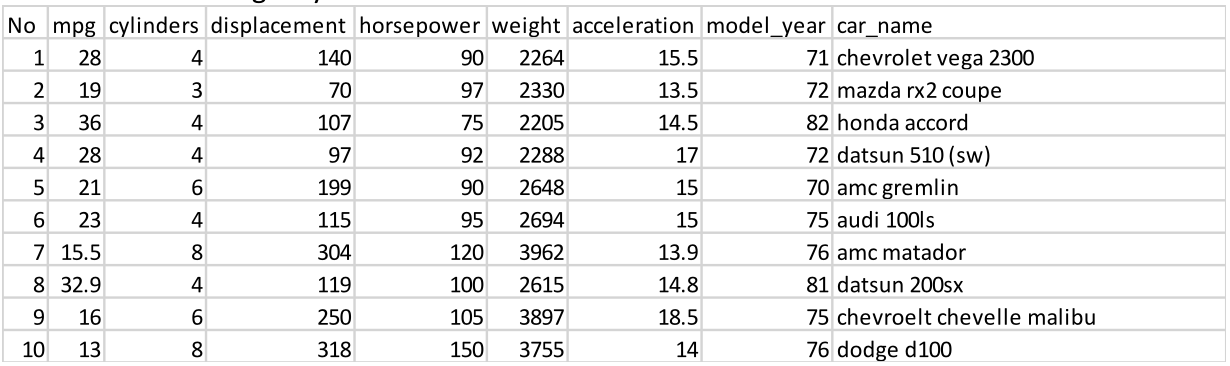

A. Summarize the data set. What is the mean of mpg?  (2 marks)

B. What is the median value of mpg?  (1 mark)

C. Which value is higher – mean or median? What does this indicate in terms of the skewness of the attribute values? Make a plot to verify your answer. (3 marks)

D. Plot the pairplot matrix of all the relevant numeric attributes. (don’t consider No and car_name)? Also print the correlation matrix for the data. (3 marks)

E. Based on the pairplot matrix and correlation matrix, which two attributes seem to be most strongly linearly correlated? What is their correlation coefficient?  (2 marks)

F. Based on the pairplot matrix and correlation matrix, which two attributes seem to be most weakly correlated? What is their correlation coefficient?  (2 marks)

G. Produce a scatterplot of the two attributes mpg and displacement with displacement on the x axis and mpg on the y axis. (3 marks)

H. Build a linear regression model with mpg as the target and displacement as the predictor. (3 marks)

Answer the following questions based on the regression model.

a. For your model, what is the value of the intercept β0 ? (1 marks)

b. For your model, what is the value of the coefficient β1 of the attribute
displacement? (1 marks)

c. What is the regression equation as per the model? (2 marks)

d. For your model, does the predicted value for mpg increase or decrease as the displacement increases? (1 marks)

e. Given a car with a displacement value of 220, what would your model predict its mpg to be? (2 marks)

f. Display a scatterplot of the actual mpg vs displacement and superimpose the
linear regression line.  (2 marks)

g. Plot the residuals. (2 marks)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


23.5145728643216
23.0


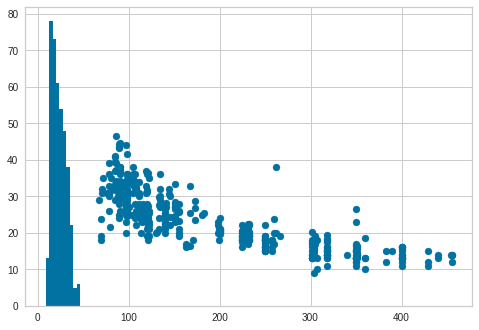

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


35.17475015429319
[-0.06028241]


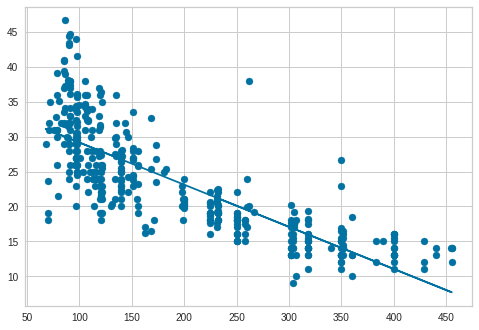

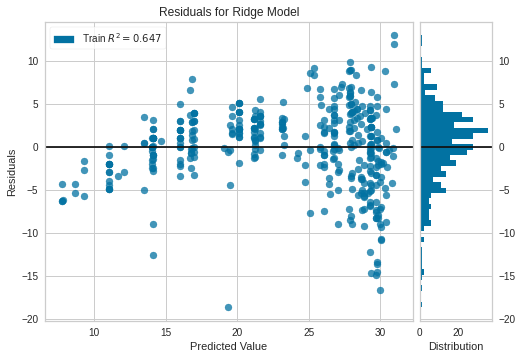

In [27]:
# Type solution here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

cars = pd.read_csv('auto-mpg.csv')

df = pd.DataFrame(cars)

#A
df.describe()

print(df['mpg'].mean())
#23.51

#B
print(df['mpg'].median())
#23.0

#C
#the average is higher, which suggests that the data 
#is skewed to the right as seen in the plot below
plt.hist(df['mpg'], bins=10)

#D
relevant = df.drop(['No','car_name'], axis=1)
#sb.pairplot(relevant)
relevant.corr()
#E
# based on the results fdrom the code above, I would say that cylinders and dispalcement
#are the most strongly correlated with a coefficient of 0.95

#F
# In a smiliar manner, acceleration and model_year appear to have the weakest correlation
# with a coefficident of 0.28


#G
plt.scatter(df['displacement'], df['mpg'])
plt.show()

#H 
model = LinearRegression()
x = df['displacement']
X = x[:, np.newaxis]
Y = df['mpg']
model.fit(X,Y)


#a
print(model.intercept_)
#35.17

#b
print(model.coef_)
#-0.06


#c
# given the 2 above answers, I can say that the regression eqution is:
# Y = 35.17 -0.06*X


#d
#the predicted value of mpg decreases as displacement increases

#e
#we plug 200 in for X into the equation I stated above, then our answer would be: 
#23.12

#f
plt.scatter(df['displacement'], df['mpg'])
predict = model.predict(X)
plt.plot(x, predict)
plt.show()


#g
ridge = Ridge()
visualizer = ResidualsPlot(ridge)
visualizer.fit(X, Y)
visualizer.poof()
plt.show()

,No,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
0,1,28.0,4,140.0,90,2264,15.5,71,chevrolet vega 2300
1,2,19.0,3,70.0,97,2330,13.5,72,mazda rx2 coupe
2,3,36.0,4,107.0,75,2205,14.5,82,honda accord
3,4,28.0,4,97.0,92,2288,17.0,72,datsun 510 (sw)
4,5,21.0,6,199.0,90,2648,15.0,70,amc gremlin
...,...,...,...,...,...,...,...,...,...
393,394,16.5,6,168.0,120,3820,16.7,76,mercedes-benz 280s
394,395,34.5,4,105.0,70,2150,14.9,79,plymouth horizon tc3
395,396,38.1,4,89.0,60,1968,18.8,80,toyota corolla tercel
396,397,30.5,4,98.0,63,2051,17.0,77,chevrolet chevette


## 3. Conceptual Questions - (20 marks)

1. What are training, validation, and testing datasets? What is the purpose of each dataset? Why do we split our data into three separate sets?  (5 marks)

2. Consider a machine learning model that has high bias and low variance. Would that model be (choose one): (a) consistently accurate; (b) consistently inaccurate; (c) inconsistently inaccurate; (d) equally right and wrong   
(2 marks)

3. We want to predict the salaries of software engineers based on the college they attended. The model was trained using data from only private colleges. How do you expect this model to perform? What would you change about the training data to improve the model's performance?  (4 marks)

4. What is the most important component of a successful machine learning project and why?  (choose one and explain) (a) high quality and unbiased data; (b) a complex and fancy modeling technique; (c) a powerful supercomputer; (d) Be a statistics expert. (5 marks)

5. Why is exploratory data analysis important to producing accurate machine learning models? Why can't we just start building models as soon as we download the data?  (4 marks)

Answer the questions here:

1.Training, testing, and validation datasets are neccessary to perform analysis on any dataset. Training datatsets are used to fit the model, the model sees and learns from this data. The Validation datasets are used to provide an unbiased evaluation of the model fit while tuning the paramters. Finally, the testing datastes are used to actually provide an unbaised evaluation of the final model fit, esentially this is the data the model will use to predict the determinant variable, based on what is has seen in the training dataset. The whole process of machine learning is based on using past experience as intell or data to better predict what will happen in the future, whihc si why splitting any dataset into these three categories is important. 










2.  A model with high bias and low variance would be consistently inaccurate.









3. There wuld be obvious flaws in this model. The data collection or sampling method used in this situation was very biased to only evaluate private schools. Therew is moore data out there to be collected that could provide more insightful answers. I would add public schools to the training set. I wuld tgry to make sure that the collection of schools in the training and testing set were much the same in terms of rankings public/private, and other paramters. This would help eliminate bias. 










4. The most important aspect of any machine learning project is to have good, unbaised, and high quality data. This is why a decent amount of time is spent on cleaning the data (data wrangling). We have to make sure that we have suitable data before we perform any analysis. There cant be a lot of bais or missing or menaingles values, otherwise our results too will be meaningless. Anyone with a computer can perform meaningfull analysis, and sometimes the simplest answer is the best one. So long as your data meets the requirements. 










5. As I said in the previous question, we need to make sure that our data is measurable and meaningfull before we perform any anyalysis on it. This includes doing summary statistics, seeing if there are any missing values, plotting histograms of different variables just to get a high level sense of what is going on. After these steps, you may find that the dataset may actually not be suitable for your ideas and future analysis, saving you a lot of time and energy compared to jumping into the models head first. 
